# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

I used the numpy library to calculate summary statistics of the traffic signs data set:

* The size of training set is 34799 samples
* The size of the validation set is 4410 samples
* The size of test set is 12630 samples
* The shape of a traffic sign image is (32, 32, 3)
* The number of unique classes/labels in the data set is 43


In [4]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data

training_file = './/train.p'
validation_file='.//valid.p'
testing_file = './/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(y_train)


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(X_valid.shape)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 34799
(4410, 32, 32, 3)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

# exploratory visualization of the dataset.
Here is an exploratory visualization of the training data set.I have randomly taken a image and showed it . Later I have 
shown the images in test data too

13


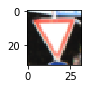

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])



  Here is an exploratory visualization of the data set. It is a histogram showing the number of labels for each sample ...

[41 41 41 ..., 25 25 25]


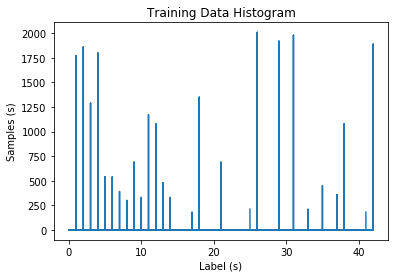

In [7]:
print(y_train)

plt.figure()
train_histogram = np.histogram(y_train,n_classes)
plt.title("Training Data Histogram")
plt.xlabel("Label (s)")
plt.ylabel("Samples (s)")
plt.plot(y_train,train_histogram[0])



By using the figure function of matplot library I have visualize 5 samples images for each label .

0. Speed limit (20km/h) - Samples: 60


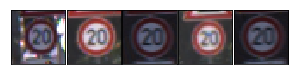

1. Speed limit (30km/h) - Samples: 720


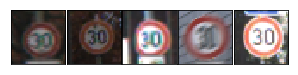

2. Speed limit (50km/h) - Samples: 750


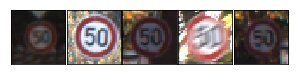

3. Speed limit (60km/h) - Samples: 450


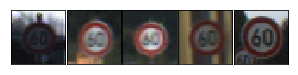

4. Speed limit (70km/h) - Samples: 660


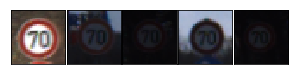

5. Speed limit (80km/h) - Samples: 630


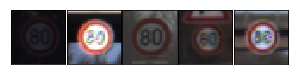

6. End of speed limit (80km/h) - Samples: 150


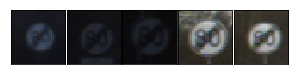

7. Speed limit (100km/h) - Samples: 450


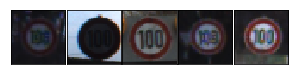

8. Speed limit (120km/h) - Samples: 450


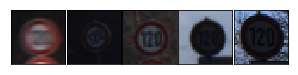

9. No passing - Samples: 480


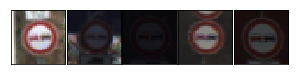

10. No passing for vehicles over 3.5 metric tons - Samples: 660


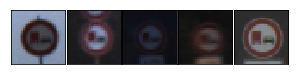

11. Right-of-way at the next intersection - Samples: 420


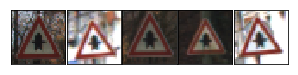

12. Priority road - Samples: 690


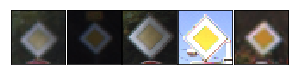

13. Yield - Samples: 720


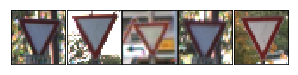

14. Stop - Samples: 270


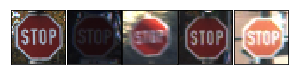

15. No vehicles - Samples: 210


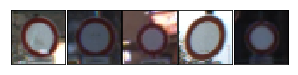

16. Vehicles over 3.5 metric tons prohibited - Samples: 150


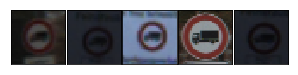

17. No entry - Samples: 360


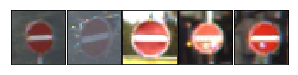

18. General caution - Samples: 390


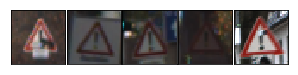

19. Dangerous curve to the left - Samples: 60


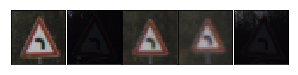

20. Dangerous curve to the right - Samples: 90


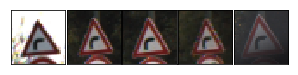

21. Double curve - Samples: 90


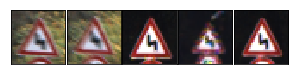

22. Bumpy road - Samples: 120


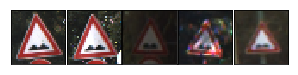

23. Slippery road - Samples: 150


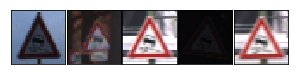

24. Road narrows on the right - Samples: 90


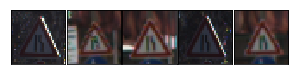

25. Road work - Samples: 480


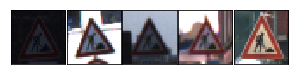

26. Traffic signals - Samples: 180


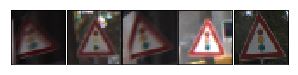

27. Pedestrians - Samples: 60


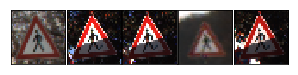

28. Children crossing - Samples: 150


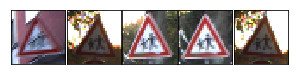

29. Bicycles crossing - Samples: 90


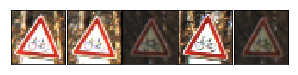

30. Beware of ice/snow - Samples: 150


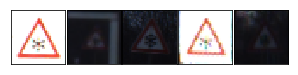

31. Wild animals crossing - Samples: 270


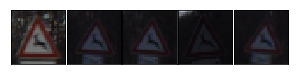

32. End of all speed and passing limits - Samples: 60


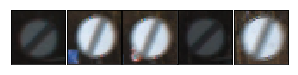

33. Turn right ahead - Samples: 210


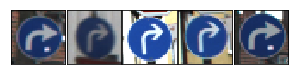

34. Turn left ahead - Samples: 120


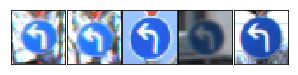

35. Ahead only - Samples: 390


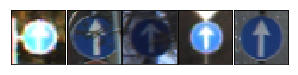

36. Go straight or right - Samples: 120


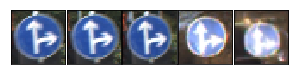

37. Go straight or left - Samples: 60


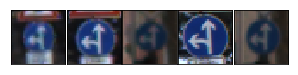

38. Keep right - Samples: 690


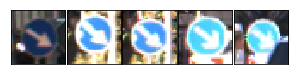

39. Keep left - Samples: 90


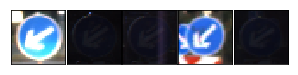

40. Roundabout mandatory - Samples: 90


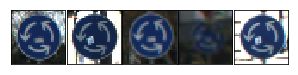

41. End of no passing - Samples: 60


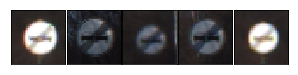

42. End of no passing by vehicles over 3.5 metric tons - Samples: 90


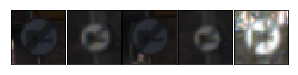

In [8]:
def getSignNames():
    return pd.read_csv('./signnames.csv').values

def plotImages(X, y, per_sign_example=5, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y)
    for sign in getSignNames():
        print("{0}. {1} - Samples: {2}".format(sign[0], sign[1], samples_per_sign[sign[0]]))
        sample_indices = np.where(y==sign[0])[0]
        random_samples = random.sample(list(sample_indices), per_sign_example)
        fig = plt.figure(figsize = (per_sign_example, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(per_sign_example):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,per_sign_example, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
        
plotImages(X_test, y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step, I decided to normalize the images so that the data has mean zero and equal variance. To do that I created a function named as normalize .

In this first I changed the image data to single channel image and then used this formula (pixel - 128)/ 128 on the resultant data so that the data has mean zero and equal variance.

After this i get a normalized image data which i will be using in training validation and testing of my images .

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

print(X_train.shape)
def normalize(data):
    data=np.average(data,axis=3)
    data=(data-128)/128
    return np.reshape(data,(len(data),len(data[0]),len(data[0][0]),1))



X_test=normalize(X_test)
X_valid=normalize(X_valid)
X_train=normalize(X_train)
print(X_train.shape)

(34799, 32, 32, 3)
(34799, 32, 32, 1)


### Model Architecture

#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 GreyScale Image				         
| Convolution 3x3     	| 1x1 stride, valid padding outputs 28x28x6  	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6  				|
| Convolution 3x3	    | 1x1 stride, valid padding outputs 10x10x16  	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16   				|
| Fully connected		| Input 400 Weight(400,120) Bias(120) O/P 120	|
| RELU					|												|
| DROPOUT				|70%    										|          
| Fully connected		| Input 120 Weight(120,84 ) Bias(84) O/P 84 	|
| RELU					|												|
| DROPOUT				|80%    										|
| Fully connected		| Input 120 Weight(84,43 ) Bias(43) O/P 43   	|


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.
To train the model, I used an LeNet for the most part that was given, but I did add an additional dropout after the RELU of 
fully connected layer abd the AdamOptimizer with a learning rate of 0.001. The epochs used was 100 while the batch size was 128. 
Other important parameters I learned were important was the number and distribution of additional data generated. 
I played around with various different distributions of image class counts and it had a dramatic effect on the training set 
accuracy. It didnt really have much of an effect on the test set accuracy, or real world image accuracy. Even just using the 
default settings from the Udacity lesson leading up to this point I was able to get 94% accuracy with virtually no changes on 
the test set. When I finally stopped testing I got 93.8-94.5% accuracy on the test set though so I think it could have increased 
if i would have implemented the augmentation but because of the time constraint my focus was on implementing the network.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.utils import shuffle


X_train, y_train = shuffle(X_train, y_train)
EPOCHS = 100
BATCH_SIZE = 128

In [11]:
from tensorflow.contrib.layers import flatten
def LeNet(x,keep_prob1,keep_prob2):    
    mu = 0.01 # 0.00
    sigma = 0.10 # 0.10
    
    # CNN 1: 32x32x3 ==> 28x28x6 (Convolutional Neural Network)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Act 1: 28x28x6 ==> 28x28x6, Pooling 1: 28x28x6 ==> 14x14x6
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
   
    # CNN 2: 14x14x6 ==> 10x10x16 (Convolutional Neural Network)
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Act 2: 10x10x16 ==> 10x10x16, Pooling 2: 10x10x16 ==> 5x5x16
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
 
    # Flatten: 5x5x16 ==> 400.
    fc0   = flatten(conv2)
        
    # FC 1: 400 ==> 120 (Fully Connected)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Act 1: 120 ==> 120 
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1,keep_prob1)
    # FC 2: 120 ==> 84 (Fully Connected)
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Act 2: 84 to 84.
    fc2    = tf.nn.relu(fc2)
    fc2   = tf.nn.dropout(fc2,keep_prob2)
    # FC 2: 84 ==> 43 (Fully Connected)
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))  # *** 43 ***.
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
kb1=tf.placeholder(tf.float32)
kb2=tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x,kb1,kb2)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,kb1:1.,kb2:1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.
My final model results were:
* training set accuracy of 100%
* validation set accuracy of 96.1%
* test set accuracy of 93.1%

If an iterative approach was chosen:

* What was the first architecture that was tried and why was it chosen?
  I used a very similar architecture to the one given in the classroom under the deep learning module. Because it helped to visualize and pratically implement the concepts that I learned in the classroom. 
  
* What were some problems with the initial architecture?
  The issue was the lack of Knowlege of all parameters. Due to which i was unable to get accuracy more than 90-92% so I shifted to LeNet architecture.
  
* How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to overfitting or underfitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.


I didn't alter much past adding a couple dropouts with a 70% probability for the first fully connected layer and then 80% probality for the second connected layer.


* Which parameters were tuned? How were they adjusted and why?
    
  Epoch, learning rate, batch size, and drop out probability were all parameters tuned For Epoch the main reason I tuned this was i was gettin accuracy in increasing order for the first 50 epoch so i had a strong confidence that if i increase it to 100 then I will get a better accuracy.
  
The batch size was not much altered since the size of good enough to provide a good accuracy . The learning rate is .001  as I am told it is a normal starting point, but I just wanted to try something different so .00097 was used. I think it mattered little. The dropout probability mattered a lot early on, but after awhile I set it to 70% for the first fully connected layer and 80% for the second fully connected layer and then i just left it. 



* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?

I think I could go over this project for another week and keep on learning. I think this is a good question and I could still learn more about that. I think the most important thing I learned was having a more uniform dataset along with enough convolutions to capture features will greatly improve speed of training and accuracy.'''

In [13]:

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    cost=[]
    batch=[]
    val=0
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, loss = sess.run([training_operation,loss_operation], feed_dict={x: batch_x, y: batch_y,kb1:0.8,kb2:0.7})
        cost.append(loss)
        val+=BATCH_SIZE
        batch.append(val)
        
        
        validation_accuracy = evaluate(X_valid, y_valid)
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        
    
    
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.654
Train Accuracy = 0.723
EPOCH 2 ...
Validation Accuracy = 0.845
Train Accuracy = 0.911
EPOCH 3 ...
Validation Accuracy = 0.904
Train Accuracy = 0.952
EPOCH 4 ...
Validation Accuracy = 0.895
Train Accuracy = 0.959
EPOCH 5 ...
Validation Accuracy = 0.922
Train Accuracy = 0.977
EPOCH 6 ...
Validation Accuracy = 0.934
Train Accuracy = 0.983
EPOCH 7 ...
Validation Accuracy = 0.929
Train Accuracy = 0.988
EPOCH 8 ...
Validation Accuracy = 0.933
Train Accuracy = 0.989
EPOCH 9 ...
Validation Accuracy = 0.940
Train Accuracy = 0.992
EPOCH 10 ...
Validation Accuracy = 0.934
Train Accuracy = 0.992
EPOCH 11 ...
Validation Accuracy = 0.942
Train Accuracy = 0.994
EPOCH 12 ...
Validation Accuracy = 0.937
Train Accuracy = 0.995
EPOCH 13 ...
Validation Accuracy = 0.944
Train Accuracy = 0.995
EPOCH 14 ...
Validation Accuracy = 0.933
Train Accuracy = 0.996
EPOCH 15 ...
Validation Accuracy = 0.949
Train Accuracy = 0.996
EPOCH 16 ...
Validation Accuracy = 0

This graph shows the decrease in cost for 100 epochs

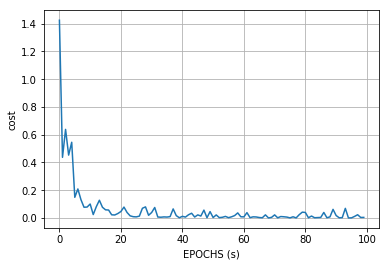

In [14]:
import matplotlib.pyplot as plt
ep=[]
for i in range(EPOCHS):
    ep.append(i)
plt.plot(ep, cost)

plt.xlabel('EPOCHS (s)')
plt.ylabel('cost')
plt.grid(True)
plt.savefig("costGraph.png")
plt.show()



In [17]:
print(y_test)
print(X_test.shape)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

[16  1 38 ...,  6  7 10]
(12630, 32, 32, 1)
Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

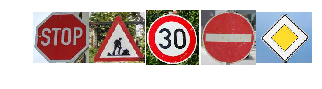

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Load pickled data
import pickle
import tensorflow as tf
import cv2
import glob
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
# TODO: Fill this in based on where you saved the training and testing data

label=[]
images=[]


fig,axs=plt.subplots(1,5,figsize=(5,1))
fig.subplots_adjust(hspace = .2 ,wspace = .001)

axs = axs.ravel()
        
        
def normalize(data):
    data=np.average(data,axis=3)
    data=(data-128)/128
    return np.reshape(data,(len(data),len(data[0]),len(data[0][0]),1))

for i,filename in enumerate(glob.glob('./testImage/*.jpg')):
    im=cv2.imread(filename)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im=cv2.resize(im,(32,32))
    images.append(im)




Here are five German traffic signs that I found on the web:
The road work  be difficult to classify because of the background present in the image.

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

n_images=np.array(images)

n_images=normalize(n_images)
label=[14,25,1,17,12]

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, './lenet')
    log=sess.run(logits,feed_dict={x:n_images,y:label,kb1:1.,kb2:1.})
    predict_label=np.argmax(log,axis=1)
    print(predict_label)




[14 11  1 17 12]


# The labels provided by me
| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Stop Sign      		| Stop sign   									| 
| Road Work    			| Traffic Signal								|
| 30 km/h				| 30 km/h										|
| No entry	      		| No entry   					 				|
| Priority Road			| Priority Road      							|


The model was able to correctly guess 4 of the 5 traffic signs, which gives an accuracy of 80%. This compares favorably to the accuracy on the test set of 94.4% for the test images were 14,25,1,17,12 while that prediceted by the network was 14 11  1 17 12.


### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
val=None
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, './lenet')
    log=sess.run(logits,feed_dict={x:n_images,y:label,kb1:1.,kb2:1.})
    test_accuracy = evaluate(n_images, label)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [33]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
probality = tf.nn.softmax(log)
top_k=tf.nn.top_k(probality, k=5)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, './lenet')
    top_k=sess.run(top_k,feed_dict={x:n_images,y:label,kb1:1.,kb2:1.})
    print(top_k)



TopKV2(values=array([[  9.98932898e-01,   4.29100648e-04,   3.50590679e-04,
          2.12787607e-04,   1.98029047e-05],
       [  9.99998808e-01,   4.47891608e-07,   4.28722984e-07,
          1.30377089e-07,   8.35273966e-08],
       [  1.00000000e+00,   9.79425782e-36,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.20298882e-18,   1.21616617e-19,
          4.86893663e-20,   1.05889054e-20],
       [  1.00000000e+00,   1.15087473e-22,   1.85727840e-26,
          2.65202710e-27,   1.15862779e-29]], dtype=float32), indices=array([[14, 39, 31, 33, 10],
       [11, 21, 30, 19, 28],
       [ 1,  5,  0,  2,  3],
       [17,  0, 26, 14, 37],
       [12, 40,  9, 15, 41]], dtype=int32))


#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)
For the first image, the model is relatively sure that this is a stop sign (probability of 0.99), we can figure this out by checking the index value . The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| .99         			| Stop sign   									| 
| .42     				| Road Work										|
| .35					| 30 km/h										|
| .21	      			| No entry  					 				|
| .19				    | Priority Road      							|


For the second image the highest probality is of 30 km/h traffic signal but it should have been highest for the road work so the it is not correct. 

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| .99         			| Stop sign   									| 
| .17     				| Road Work										|
| .14					| 30 km/h										|
| .24	      			| No entry  					 				|
| .53				    | Priority Road      							|

For the third image, the model is completely sure that this is a 30 km/hr (probability of 0.100), we can figure this out by checking the index value . The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| .00         			| Stop sign   									| 
| .00    				| Road Work										|
| .100					| 30 km/h										|
| .00	      			| No entry  					 				|
| .00				    | Priority Road      							|


For the first image, the model is relatively sure that this is a No entry (probability of 0.100), we can figure this out by checking the index value . The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| .10         			| Stop sign   									| 
| .45    				| Road Work										|
| .19					| 30 km/h										|
| .100	      			| No entry  					 				|
| .66				    | Priority Road      							|

For the fifth image, the model is relatively sure that this is a Priority (probability of 0.99), we can figure this out by checking the index value . The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| .00         			| Stop sign   									| 
| .00    				| Road Work										|
| .00					| 30 km/h										|
| .00	      			| No entry  					 				|
| .100				    | Priority Road      							|


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [25]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")